In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
df1 = pd.read_csv(r'C:\Users\Alok Agrawal\Desktop\deliveries.csv')
df2 = pd.read_csv(r'C:\Users\Alok Agrawal\Desktop\matches.csv')

In [4]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
#checking for null values
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
df1.shape

(179078, 21)

In [7]:
#Since the missing values in columns are hhuge in number we will drop that columns
df1.drop(columns=['player_dismissed','dismissal_kind','fielder'],inplace=True)

In [8]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
#check for missing values
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
df2.shape

(756, 18)

In [12]:
#drop umpire 3 column
df2.drop(columns=['umpire3'],inplace=True)

In [15]:
df2.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [16]:
#fill missing values
df2['city'].fillna(method='ffill',inplace=True)
df2['winner'].fillna(method='ffill',inplace=True)
df2['player_of_match'].fillna(method='ffill',inplace=True)
df2['umpire1'].fillna(method='ffill',inplace=True)
df2['umpire2'].fillna(method='ffill',inplace=True)

In [17]:
#check for null values again
df2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [18]:
print("Basic Overview Of Matches Dataset : \n")
print('Number Of Matches Played :',df2.shape[0])
print("Number Of Seasons Played : ",df2['season'].value_counts().nunique())
print("Top 10 Prominent Players of IPL : \n", df2['player_of_match'].value_counts()[:10])
print("Most Winning Team and Number Of Matches: \n",df2['winner'].value_counts())
print("Most Winning Team: \n",df2['winner'].value_counts().idxmax())
print("Player Of The Match & Number Of Matches : \n",df2['player_of_match'].value_counts())
print("Player Of The Match For Max . Matches : \n",df2['player_of_match'].value_counts().idxmax())

Basic Overview Of Matches Dataset : 

Number Of Matches Played : 756
Number Of Seasons Played :  7
Top 10 Prominent Players of IPL : 
 CH Gayle          21
AB de Villiers    20
DA Warner         18
MS Dhoni          17
RG Sharma         17
SR Watson         16
YK Pathan         16
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64
Most Winning Team and Number Of Matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           93
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                76
Delhi Daredevils                67
Sunrisers Hyderabad             59
Deccan Chargers                 30
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64
Most Winning Team: 
 Mum

In [19]:
print('\n')
#Some Condtional Filtering :
big_margin=df2[(df2['win_by_runs']>=100) | (df2['win_by_wickets']>=8)]
print(big_margin.winner.value_counts())



Royal Challengers Bangalore    19
Kolkata Knight Riders          17
Mumbai Indians                 15
Delhi Daredevils               13
Rajasthan Royals               12
Chennai Super Kings            11
Kings XI Punjab                 9
Sunrisers Hyderabad             9
Kochi Tuskers Kerala            2
Deccan Chargers                 2
Rising Pune Supergiants         1
Rising Pune Supergiant          1
Name: winner, dtype: int64


In [20]:
print("Number Of Seasons Played IN Different Cities : \n",df2.groupby('city')['season'].nunique())
print("Number Of Winners In Different Cities \n",df2.groupby('city')['winner'].nunique())
print("Winners in Cities \n",df2.groupby('city')['winner'].value_counts())

Number Of Seasons Played IN Different Cities : 
 city
Abu Dhabi          1
Ahmedabad          3
Bangalore          9
Bengaluru          2
Bloemfontein       1
Cape Town          1
Centurion          1
Chandigarh         9
Chennai            8
Cuttack            3
Delhi             11
Dharamsala         4
Durban             1
East London        1
Hyderabad         10
Indore             3
Jaipur             7
Johannesburg       1
Kanpur             2
Kimberley          1
Kochi              1
Kolkata           11
Mohali             2
Mumbai            11
Nagpur             1
Port Elizabeth     1
Pune               6
Raipur             3
Rajkot             2
Ranchi             3
Sharjah            1
Visakhapatnam      4
Name: season, dtype: int64
Number Of Winners In Different Cities 
 city
Abu Dhabi          7
Ahmedabad          6
Bangalore         11
Bengaluru          7
Bloemfontein       2
Cape Town          6
Centurion          7
Chandigarh        10
Chennai            9
Cuttack      

In [21]:

print("Match where team won by highest runs",df2.iloc[df2['win_by_runs'].idxmax()])
print('\n')
print("Match where team won by highest wickets",df2.iloc[df2['win_by_wickets'].idxmax()])

Match where team won by highest runs id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


Match where team won by highest wickets id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat L

In [22]:
print("Basic Overview of Deliveries Dataset : \n")
print(df1.info())

Basic Overview of Deliveries Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_r

In [23]:
print("Number Of Innings And Their Counts : \n",df1['inning'].value_counts())
print("Batting Team 's Max Counts :",df1['batting_team'].value_counts())
print("Number Of Super Over Matches  : \n",df1['is_super_over'].value_counts())

Number Of Innings And Their Counts : 
 1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64
Batting Team 's Max Counts : Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64
Number Of Super Over Matches  : 
 0    178997
1        81
Name: is_super_over, dtype: int64


In [24]:
df2.corr()['win_by_runs'].sort_values(ascending=False)

win_by_runs       1.000000
dl_applied       -0.016349
season           -0.037529
id               -0.039403
win_by_wickets   -0.560420
Name: win_by_runs, dtype: float64

In [25]:
df2.corr()['win_by_wickets'].sort_values(ascending=False)

win_by_wickets    1.000000
season           -0.009379
dl_applied       -0.011631
id               -0.012239
win_by_runs      -0.560420
Name: win_by_wickets, dtype: float64

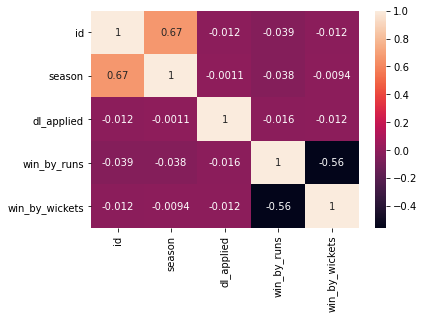

In [26]:
sns.heatmap(df2.corr(),annot=True)

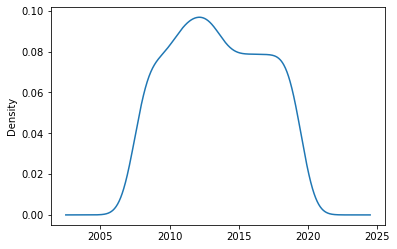

In [27]:
df2['season'].plot(kind="kde")

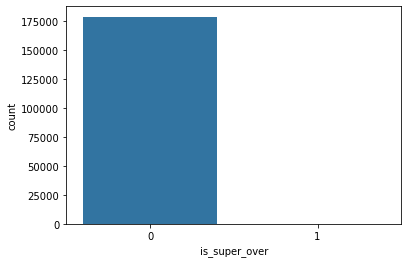

In [28]:
sns.countplot(df1['is_super_over'])

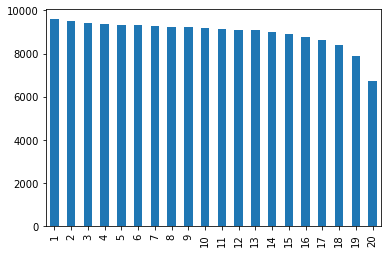

In [29]:
df1['over'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Number of total runs in Different Seasons')

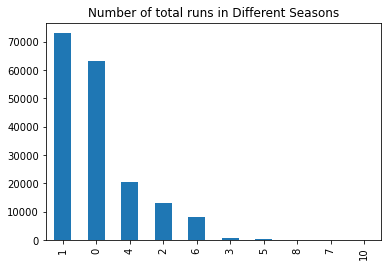

In [30]:
df1['total_runs'].value_counts().plot(kind="bar")
plt.title('Number of total runs in Different Seasons')

Text(0.5, 1.0, 'Wide Runs Scored In Matches')

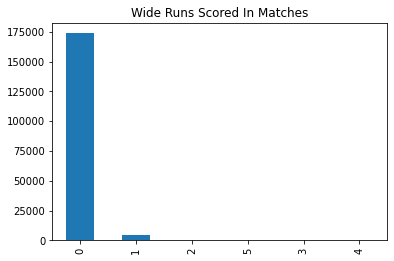

In [31]:
df1['wide_runs'].value_counts().plot(kind="bar")
plt.title("Wide Runs Scored In Matches")

In [32]:
df1.corr()['total_runs'].sort_values(ascending=False)

total_runs       1.000000
batsman_runs     0.977278
extra_runs       0.098363
over             0.086326
wide_runs        0.059077
bye_runs         0.051946
legbye_runs      0.048075
noball_runs      0.046427
match_id         0.030727
is_super_over    0.010891
penalty_runs     0.009755
ball             0.007414
inning          -0.005485
Name: total_runs, dtype: float64

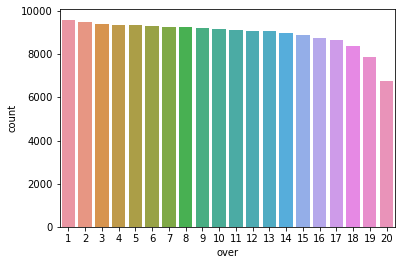

In [33]:
df1['over'].value_counts()
sns.countplot(df1['over'])

In [34]:
df1['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64